In [1]:
import numpy as np
import numpy.linalg as la
import sympy as sy
from scipy import *
from scipy.optimize import root
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
from decimal import Decimal

Acceleration of an electron in the electric field of a point-like helium ion:
$$a=-\dfrac{kq_eq_p}{m_er^2}$$
The total charge at the center of point-like helium is equal to the charge of a proton.
$$$$
$$$$
$$$$
$$$$
$$$$
The electric field of a spherical helium ion is divided into two cases:

$r>=R:$ 

The electric field of the electron cloud for $r>=R$ is the same as the electric field produced by a point electron at the origin, which means that the expression for acceleration is again:
$$a=-\dfrac{kq_eq_p}{m_er^2}$$

$r>=R:$

The electric field of a spherical helium ion for $r<=R$ is equal to the sum of the electric field produced by the electron cloud and the two protons in the nucleus, so the acceleration of the electron will be:
$$a=-\dfrac{\dfrac{k2q_pq_e}{r^2}-\dfrac{kq_e^2r}{R^3}}{m_e}$$

The electric field produced by the electron cloud is obtained using Gauss’s law, and the acceleration of the electron is always directed toward the center.

$$$$
$$$$
$$$$
$$$$
$$$$
The motion of the electron takes place in a central force field, so the following holds:

$\dfrac{d\vec{L}}{dt}=\vec{M}=\vec{r}~x~\vec{F}$ where $\vec{r}$ and $\vec{F}$ are always parallel vectors, which means $\vec{r}~x~\vec{F}=0$ This implies that the angular momentum is conserved.

It also holds that: $\vec{M}=m\vec{r}~x~\vec{v}$ which means that $\vec{M}$ is perpendicular to both $\vec{r}$ and $\vec{v}$, since is M constant $\vec{r}$ and $\vec{v}$ are perpendicular to the same constant vector, which is only possible if $\vec{r}$ and $\vec{v}$ lie in the same plane.
Therefore, the trajectory will be confined to a plane.

# -----------------------------------------------------------------------------------------------------

# Special case

$$\rho=Ae^{-r/R}$$

In [2]:
epsilon,R1,r1,theta,phi,qe,rho=sy.symbols('epsilon,R1,r1,theta,phi,qe,rho')

In [3]:
a=sy.integrate(sy.exp(-r1/R1)*r1**2,(r1,0,R1));a

-5*R1**3*exp(-1) + 2*R1**3

In [4]:
b=sy.integrate(sy.sin(theta),(theta,0,sy.pi));b

2

In [5]:
c=a*b*2*sy.pi;c

pi*(-20*R1**3*exp(-1) + 8*R1**3)

In [6]:
A=qe/c;A

qe/(pi*(-20*R1**3*exp(-1) + 8*R1**3))

$$\rho=\displaystyle \frac{q_e}{\pi \left(- \frac{20 R^{3}}{e} + 8 R^{3}\right)}e^{-r/R}$$

In [7]:
c=4*sy.pi*r1**2;c

4*pi*r1**2

In [8]:
E=sy.integrate(sy.exp(-r1/R1)*r1**2,(r1,0,r1))*A*4*sy.pi/(4*sy.pi*epsilon*r1**2);E

qe*(2*R1**3 + (-2*R1**3 - 2*R1**2*r1 - R1*r1**2)*exp(-r1/R1))/(pi*epsilon*r1**2*(-20*R1**3*exp(-1) + 8*R1**3))

In [9]:
E.subs(r1,R1).simplify()

qe/(4*pi*R1**2*epsilon)

Magnitude of the electric field produced by the cloud for $r>=R$:
$$E_u=k\dfrac{q_e}{r^2}$$
Acceleration:
$$a=-\dfrac{kq_eq_p}{m_er^2}$$
Magnitude of the electric field produced by the cloud for $r<=R$:
$$E_v=\displaystyle \frac{qe \left(2 R^{3} + \left(- 2 R^{3} - 2 R^{2} r - R r^{2}\right) e^{- \frac{r}{R}}\right)}{\pi \epsilon r^{2} \left(- \frac{20 R^{3}}{e} + 8 R^{3}\right)}$$
Acceleration:
$$a=-\dfrac{\dfrac{k2q_pq_e}{r^2}-E_vq_e}{m_e}$$

# -----------------------------------------------------------------------------------------------------

In [10]:
y0=30 #initial position
v0=3e12 #initial speed
beta=np.pi/4 #initial angle
n=10000 #number of points
delta_t=0.0000000001 #time step


beta=beta+np.pi/2
r0=y0  
x0=0.0
v0x=v0*np.cos(beta)
v0y=v0*np.sin(beta)
k=9e33
m=9.1e-31 
q=1.6e-19

In [11]:
#### First case #########
def Fx1(x,y):
    r=np.sqrt(x**2+y**2)
    Fuk=k*q*q/r**2
    Fx_ret=-Fuk*x/r
    return Fx_ret

def Fy1(x,y):
    r=np.sqrt(x**2+y**2)
    Fuk=k*q*q/r**2
    Fy_ret=-Fuk*y/r
    return Fy_ret

#### Second case #######
def Fx2(x,y):
    r=np.sqrt(x**2+y**2)
    if r>=27:
        Fuk=k*q*q/r**2
        Fx_ret=-Fuk*x/r
        
    else:
        Fuk=(k*2*q*q/r**2-k*q*q*r/27**3)
        Fx_ret=-Fuk*x/r
        
    return Fx_ret


def Fy2(x,y):
    r=np.sqrt(x**2+y**2)
    if r>=27:
        Fuk=k*q*q/r**2
        Fy_ret=-Fuk*y/r
    
    else:
        Fuk=(k*2*q*q/r**2-k*q*q*r/27**3)
        Fy_ret=-Fuk*y/r
        
    return Fy_ret

####### Special case ##########
def Fx3(x,y):
    r=np.sqrt(x**2+y**2)
    if r>=27:
        Fuk=k*q*q/r**2
        Fx_ret=-Fuk*x/r
        
    else:
        Fuk=(k*2*q*q/r**2-k*q*q*r/27**3)
        Fx_ret=-Fuk*x/r
        
    return Fx_ret


def Fy3(x,y):
    r=np.sqrt(x**2+y**2)
    if r>=27:
        Fuk=k*q*q/r**2
        Fy_ret=-Fuk*y/r
    
    else:
        m=float(E.subs(R1,27).subs(r1,r).subs(epsilon,8.85).subs(qe,1.6e-19).evalf())
        Fuk=(k*2*q*q/r**2-m*q)
        Fy_ret=-Fuk*y/r
        
    return Fy_ret


In [12]:
t=np.linspace(0,delta_t,n)

def func(P,t):
    x=P[0]
    y=P[2]
    return[P[1],Fx1(x,y)/m,P[3],Fy1(x,y)/m]

P0 = [x0,v0x,y0,v0y]
y=0
y=odeint(func,P0,t)

In [13]:
t=np.linspace(0,delta_t,n)

def func(P,t):
    x=P[0]
    y=P[2]
    return[P[1],Fx2(x,y)/m,P[3],Fy2(x,y)/m]

P0 = [x0,v0x,y0,v0y]
x=0
x=odeint(func,P0,t)

In [14]:
t=np.linspace(0,delta_t,n)

def func(P,t):
    x=P[0]
    y=P[2]
    return[P[1],Fx3(x,y)/m,P[3],Fy3(x,y)/m]

P0 = [x0,v0x,y0,v0y]
z=0
z=odeint(func,P0,t)

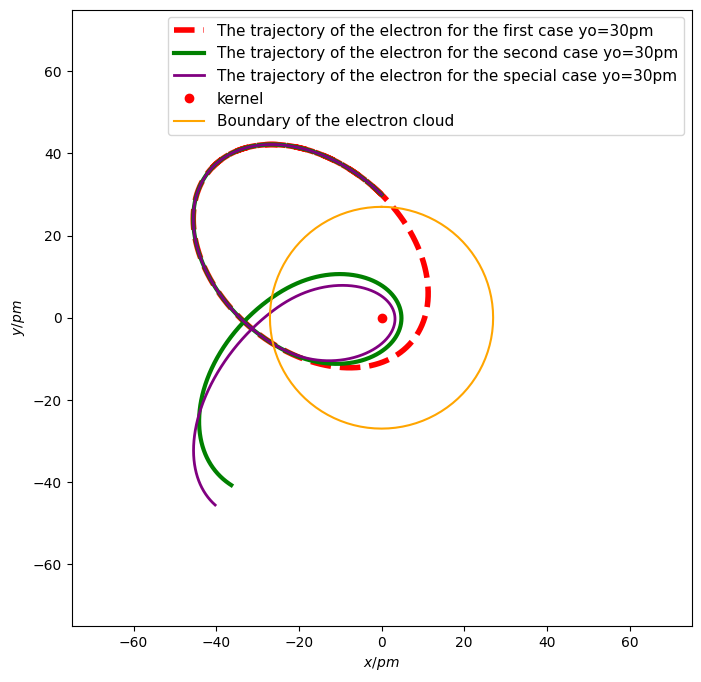

In [15]:
plt.rcParams['figure.figsize'] = [8,8]
fig1=plt.figure(1)
plt.plot(y[:,0],y[:,2],color='red',ls='--',lw=4,label='The trajectory of the electron for the first case yo=%ipm' %y0)
plt.plot(x[:,0],x[:,2],color='green',ls='-',lw=3,label='The trajectory of the electron for the second case yo=%ipm' %y0)
plt.plot(z[:,0],z[:,2],color='purple',ls='-',lw=2,label='The trajectory of the electron for the special case yo=%ipm' %y0)


plt.plot(0, 0, 'ro',label='kernel')  
fi=np.linspace(0,2*np.pi,201)
plt.plot(27*np.sin(fi),27*np.cos(fi),color='orange',label='Boundary of the electron cloud')
     
plt.xlabel(r'$x/pm$') 
plt.ylabel(r'$y/pm$')
plt.legend(fontsize=11)

plt.axis([-75,75,-75,75])
plt.show()